In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [13]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [14]:
# Load the dataset
dataset = ImageDataGenerator().flow_from_directory(
    'animals/animals/',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

X, y = next(dataset)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Found 5400 images belonging to 90 classes.


In [15]:
# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

datagen.fit(X_train)

In [16]:
# Build the CNN model
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(90, activation='softmax'))

In [17]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
# Train the model
history = model.fit_generator(datagen.flow(X_train, y_train, batch_size=32), epochs=100)

/var/folders/lk/3_zr138x3w3dvrkl0n78dj040000gn/T/ipykernel_4130/3640455062.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(X_train, y_train, batch_size=32), epochs=100)


Epoch 1/100


2023-05-24 14:04:11.852924: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


1/1 [==============================] - 1s 1s/step - loss: 2.7277 - accuracy: 0.3600
Epoch 2/100
1/1 [==============================] - 1s 1s/step - loss: 2.7946 - accuracy: 0.2800
Epoch 3/100
1/1 [==============================] - 1s 1s/step - loss: 2.9008 - accuracy: 0.2800
Epoch 4/100
1/1 [==============================] - 1s 977ms/step - loss: 2.6975 - accuracy: 0.3600
Epoch 5/100
1/1 [==============================] - 1s 972ms/step - loss: 2.5519 - accuracy: 0.2800
Epoch 6/100
1/1 [==============================] - 1s 1s/step - loss: 2.7102 - accuracy: 0.3200
Epoch 7/100
1/1 [==============================] - 1s 1s/step - loss: 2.2836 - accuracy: 0.4000
Epoch 8/100
1/1 [==============================] - 1s 1s/step - loss: 2.8514 - accuracy: 0.3600
Epoch 9/100
1/1 [==============================] - 1s 1s/step - loss: 2.3120 - accuracy: 0.4400
Epoch 10/100
1/1 [==============================] - 1s 1s/step - loss: 2.4162 - accuracy: 0.3600
Epoch 11/100
1/1 [===========================

1/1 [==============================] - 1s 1s/step - loss: 0.5344 - accuracy: 0.8000
Epoch 85/100
1/1 [==============================] - 1s 1s/step - loss: 0.3122 - accuracy: 0.8800
Epoch 86/100
1/1 [==============================] - 1s 1s/step - loss: 0.4238 - accuracy: 0.8400
Epoch 87/100
1/1 [==============================] - 1s 1s/step - loss: 0.3145 - accuracy: 0.9600
Epoch 88/100
1/1 [==============================] - 1s 1s/step - loss: 0.4574 - accuracy: 0.7600
Epoch 89/100
1/1 [==============================] - 1s 1s/step - loss: 0.3824 - accuracy: 0.8800
Epoch 90/100
1/1 [==============================] - 1s 1s/step - loss: 0.6755 - accuracy: 0.8800
Epoch 91/100
1/1 [==============================] - 1s 1s/step - loss: 0.4899 - accuracy: 0.8000
Epoch 92/100
1/1 [==============================] - 1s 1s/step - loss: 0.3267 - accuracy: 0.9200
Epoch 93/100
1/1 [==============================] - 1s 1s/step - loss: 0.3467 - accuracy: 0.8800
Epoch 94/100
1/1 [=========================

In [23]:
# Evaluate the model
score = model.evaluate(X, y, verbose=0)
print('Train loss:', score[0])
print('Train accuracy:', score[1])

Train loss: 25.204391479492188
Train accuracy: 0.75


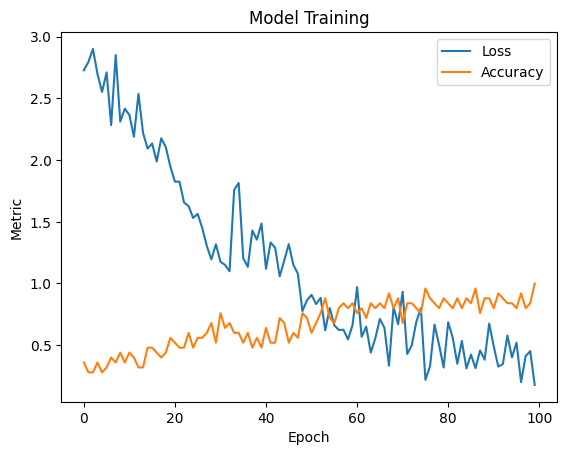

In [24]:
# Plot the training curves
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('Model Training')
plt.ylabel('Metric')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'], loc='upper right')
plt.show()